<h2>Import Libraries</h2>

In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import mutual_info_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

<h2>Load Dataset</h2>

In [2]:
# Load and display the bodyfat dataset
df = pd.read_csv("./data/bodyfat.csv")
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<h2>Exploratory Data Analysis</h2>

In [3]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


<p><b>Findings:</b> 
    <ul>
        <li>None of the attributes have null values.
        <li>The dataset comprizes of 252 instances.
    </ul>
</p>

Distribution plots for Density feature is shown below.


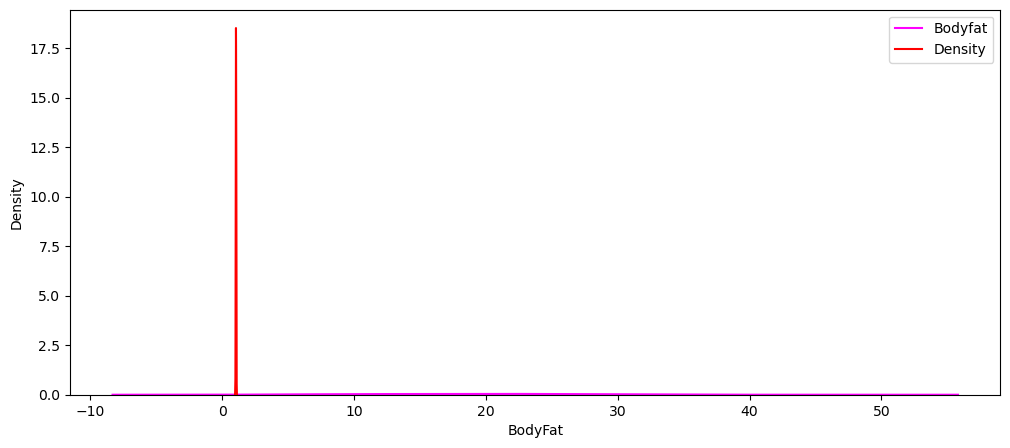

----------------------------------------------------------------------------------------------------
Distribution plots for BodyFat feature is shown below.


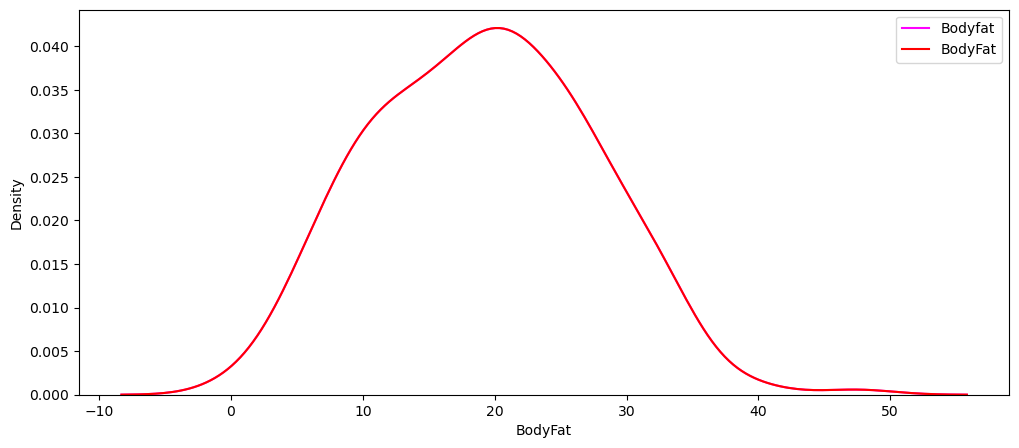

----------------------------------------------------------------------------------------------------
Distribution plots for Age feature is shown below.


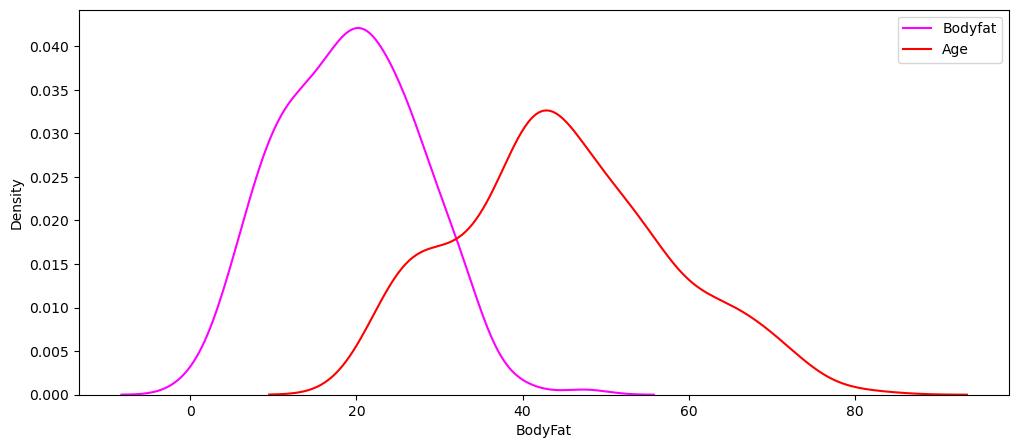

----------------------------------------------------------------------------------------------------
Distribution plots for Weight feature is shown below.


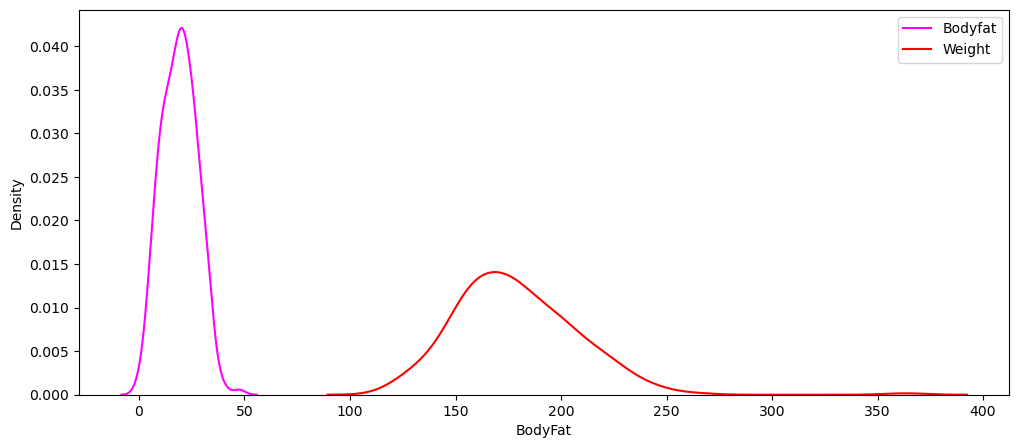

----------------------------------------------------------------------------------------------------
Distribution plots for Height feature is shown below.


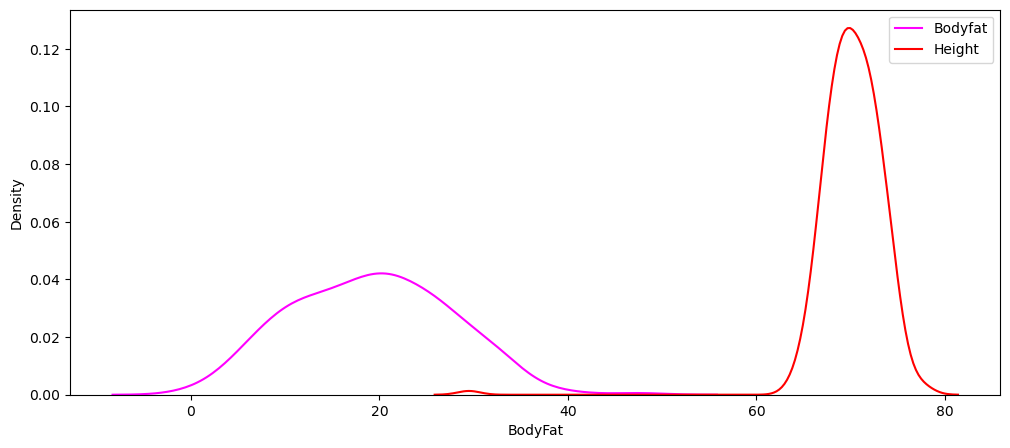

----------------------------------------------------------------------------------------------------
Distribution plots for Neck feature is shown below.


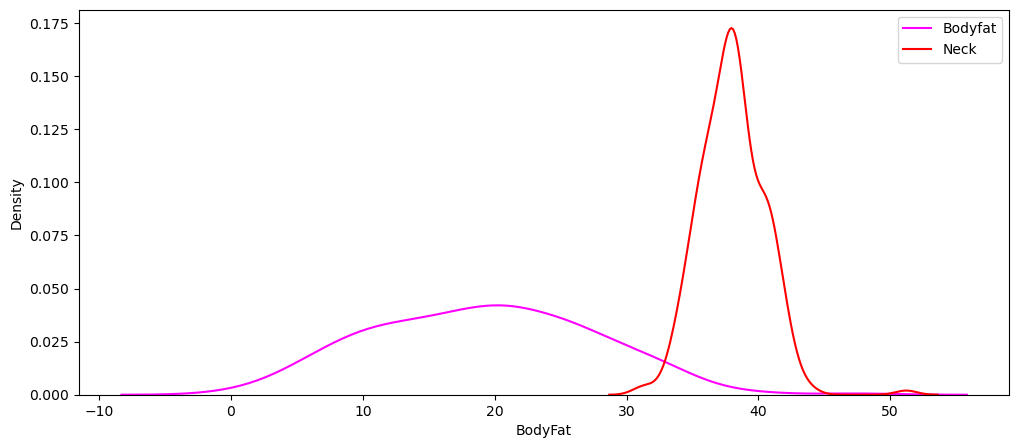

----------------------------------------------------------------------------------------------------
Distribution plots for Chest feature is shown below.


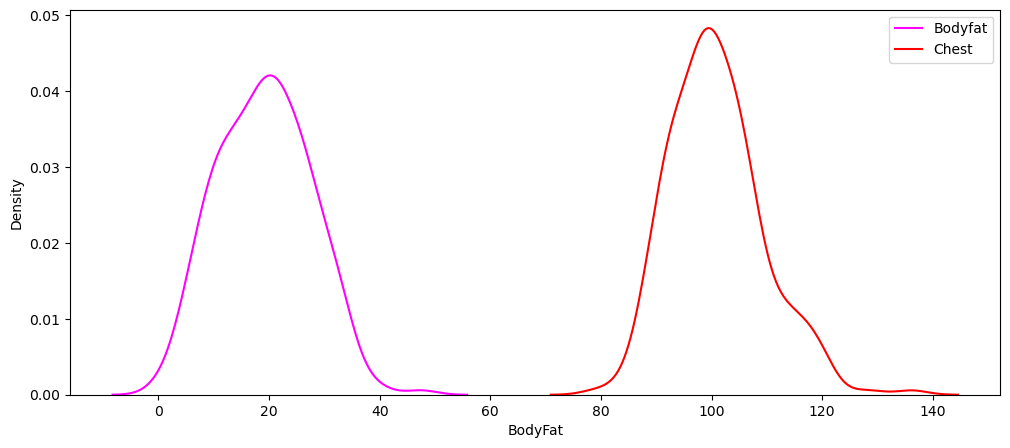

----------------------------------------------------------------------------------------------------
Distribution plots for Abdomen feature is shown below.


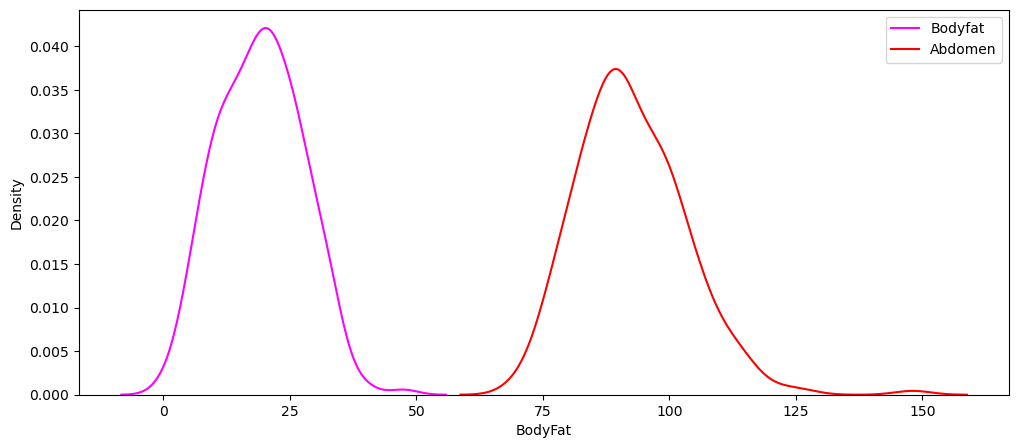

----------------------------------------------------------------------------------------------------
Distribution plots for Hip feature is shown below.


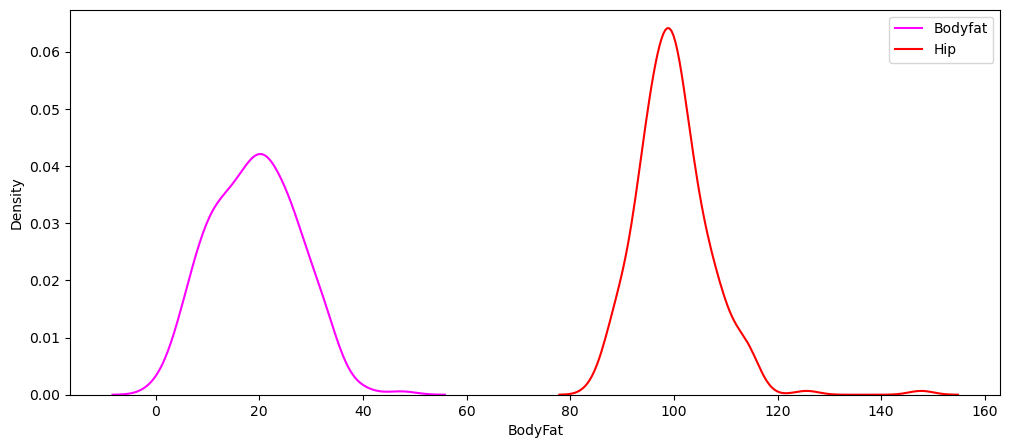

----------------------------------------------------------------------------------------------------
Distribution plots for Thigh feature is shown below.


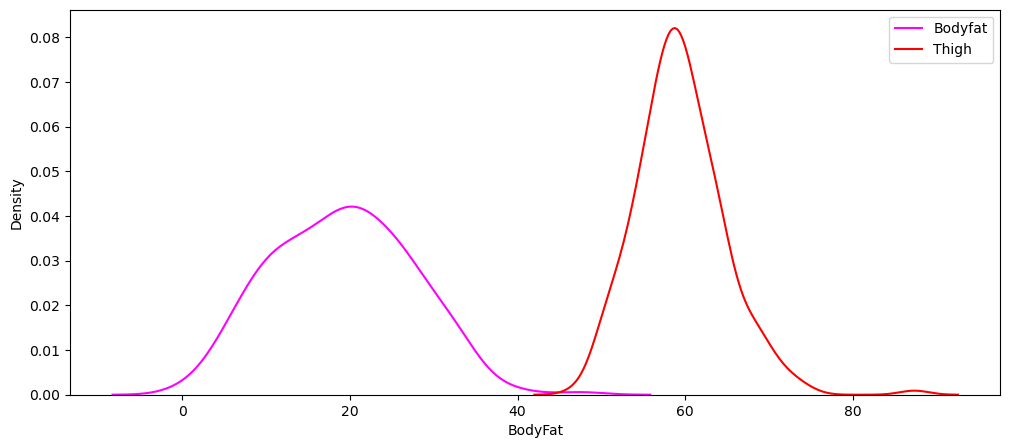

----------------------------------------------------------------------------------------------------
Distribution plots for Knee feature is shown below.


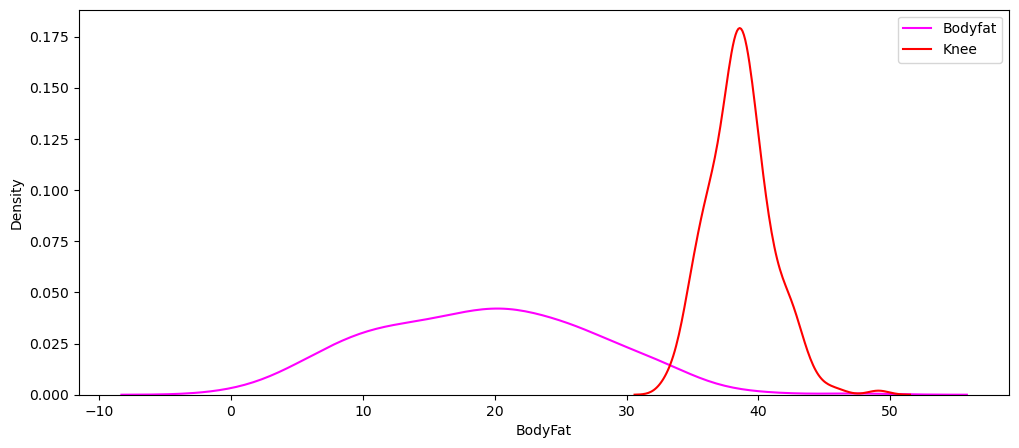

----------------------------------------------------------------------------------------------------
Distribution plots for Ankle feature is shown below.


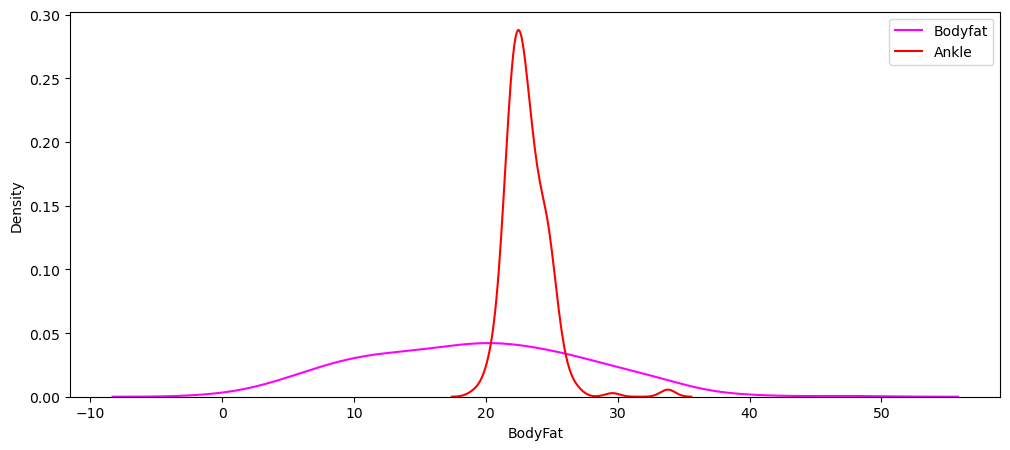

----------------------------------------------------------------------------------------------------
Distribution plots for Biceps feature is shown below.


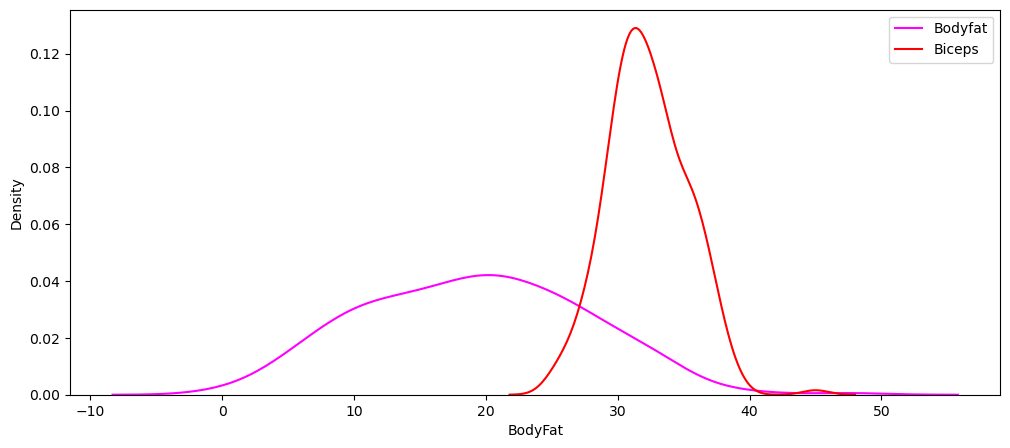

----------------------------------------------------------------------------------------------------
Distribution plots for Forearm feature is shown below.


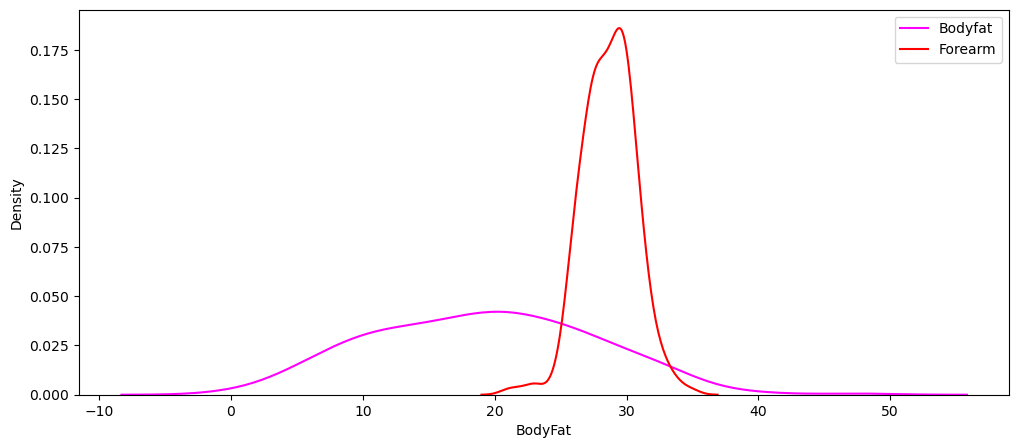

----------------------------------------------------------------------------------------------------
Distribution plots for Wrist feature is shown below.


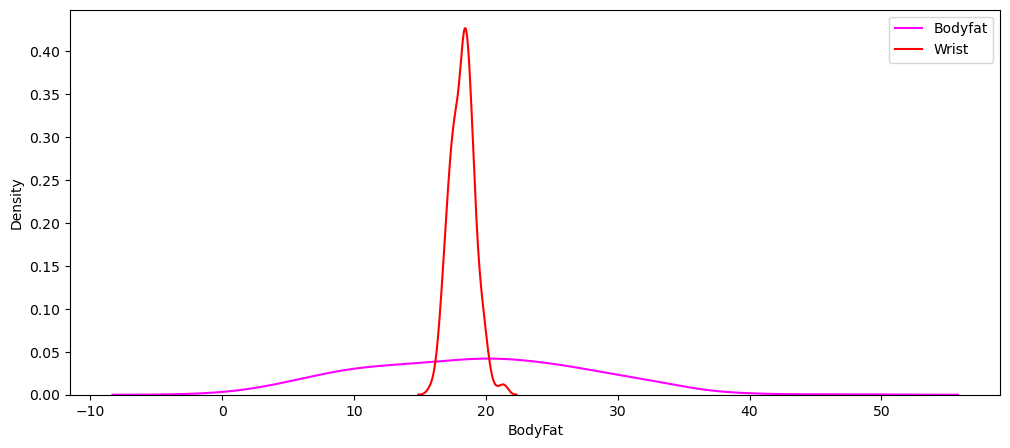

----------------------------------------------------------------------------------------------------


In [4]:
# Check the distribution of attributes in the dataset
def plotdistplots(col):
    plt.figure(figsize=(12,5))
    sns.kdeplot(df["BodyFat"], color="magenta", label="Bodyfat")
    sns.kdeplot(df[col], color="red", label=col)
    plt.legend()
    plt.show()
    
cols = list(df.columns)
for col in cols:
    print(f"Distribution plots for {col} feature is shown below.")
    plotdistplots(col)
    print("-"*100)

Distribution plots for the feature Density are shown below


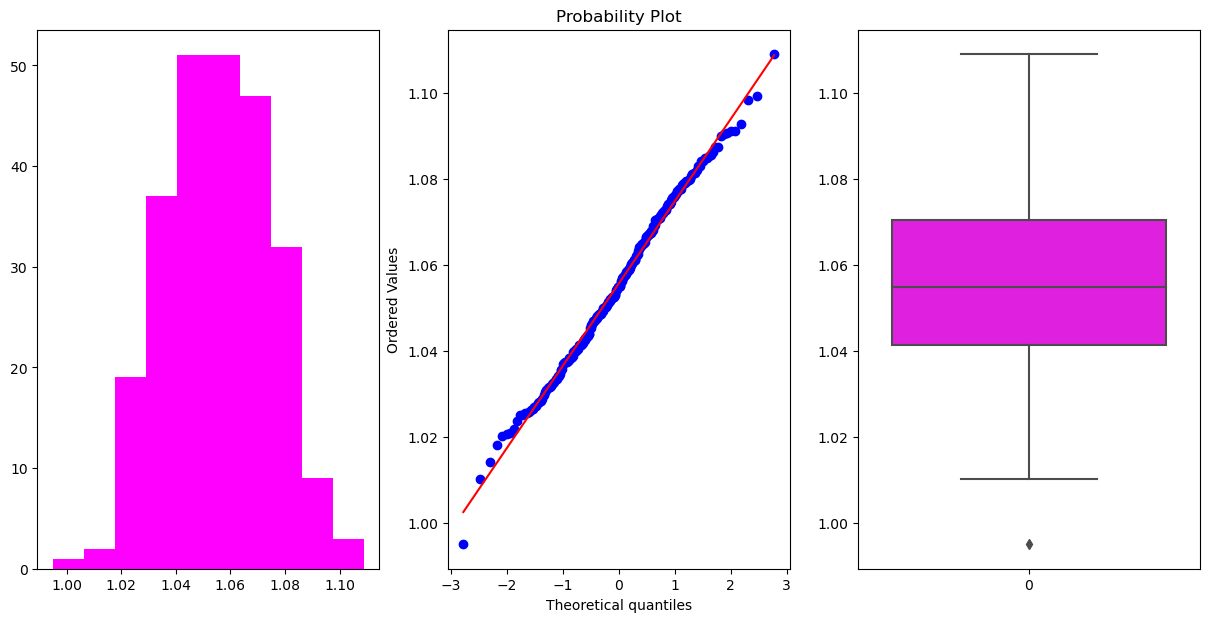

----------------------------------------------------------------------------------------------------
Distribution plots for the feature BodyFat are shown below


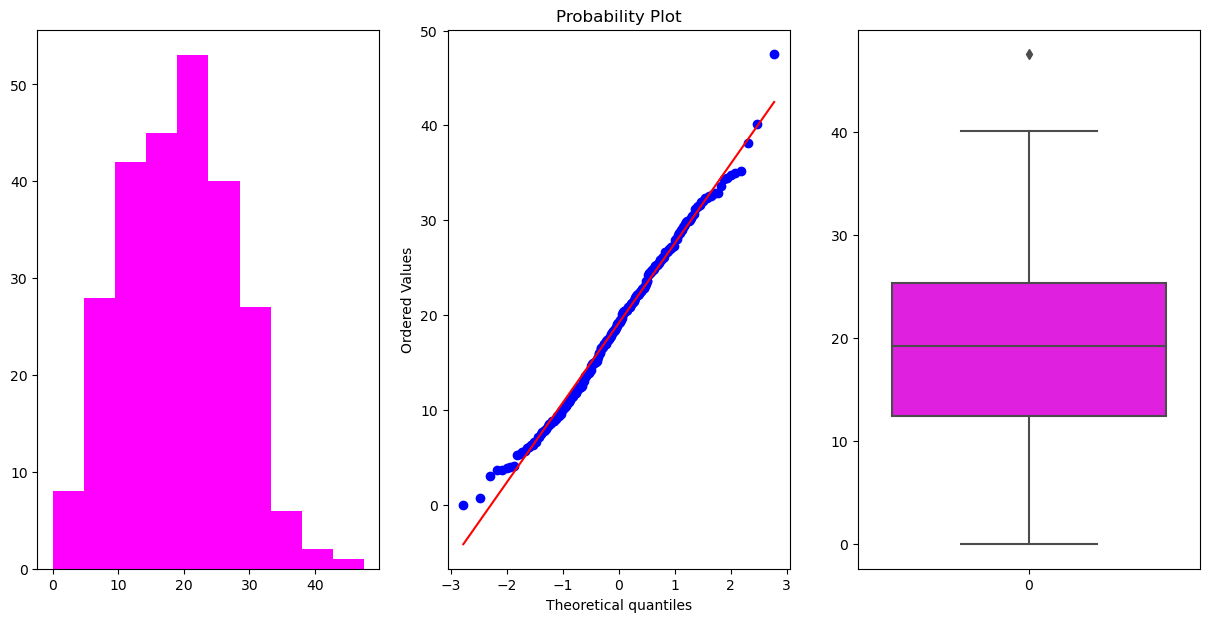

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Age are shown below


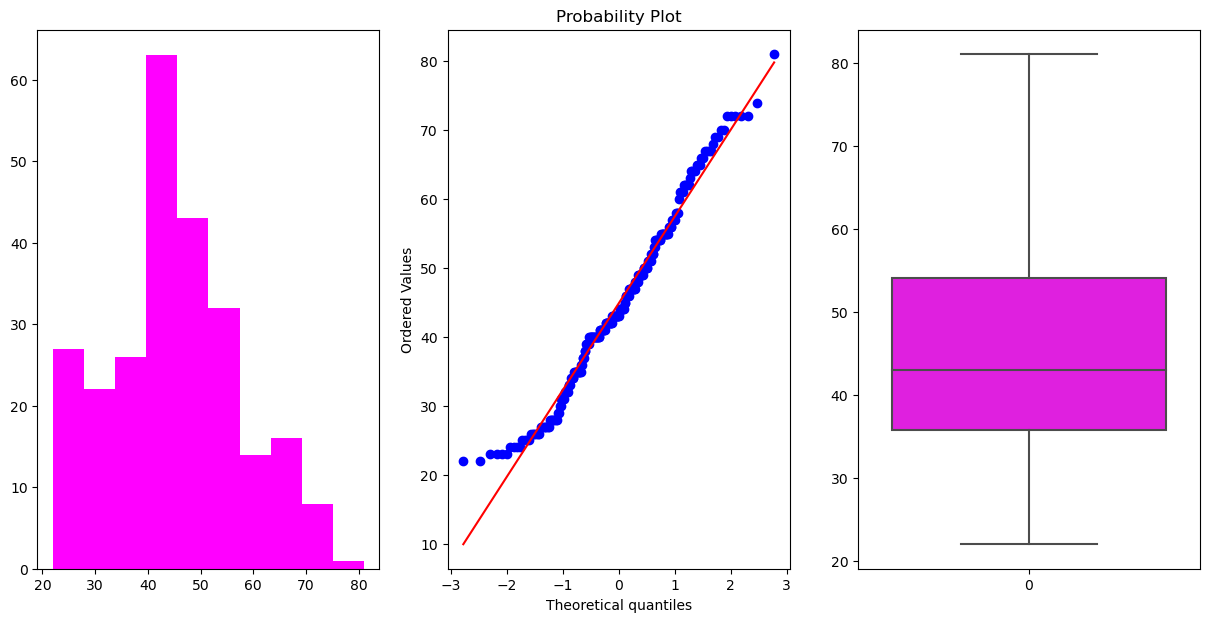

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Weight are shown below


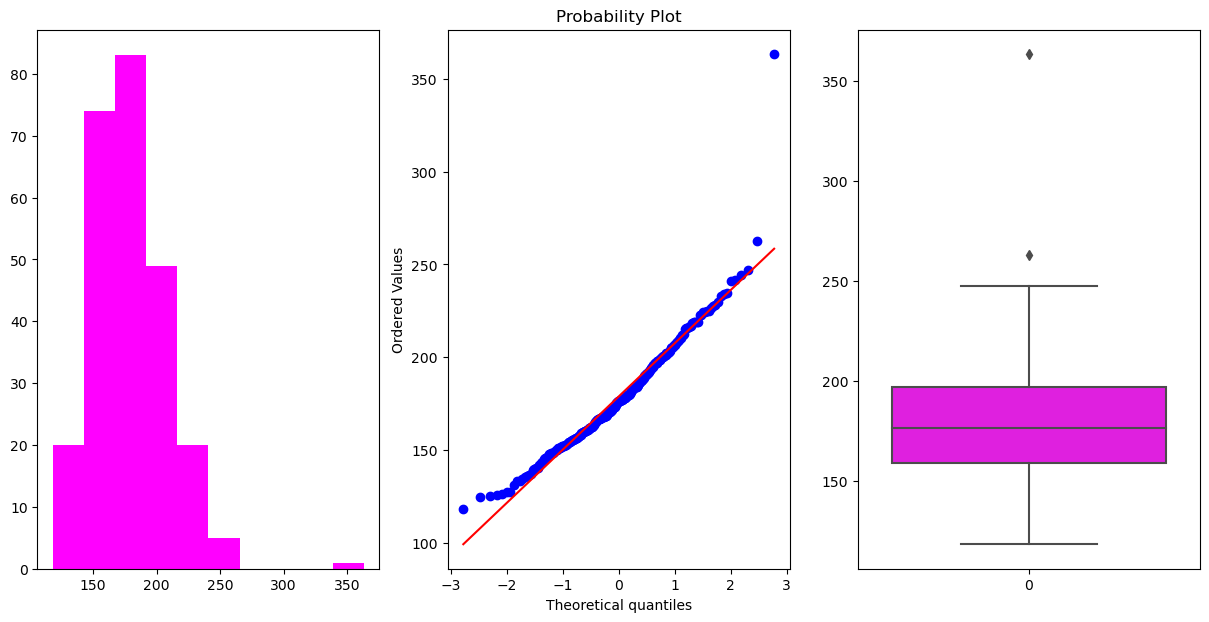

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Height are shown below


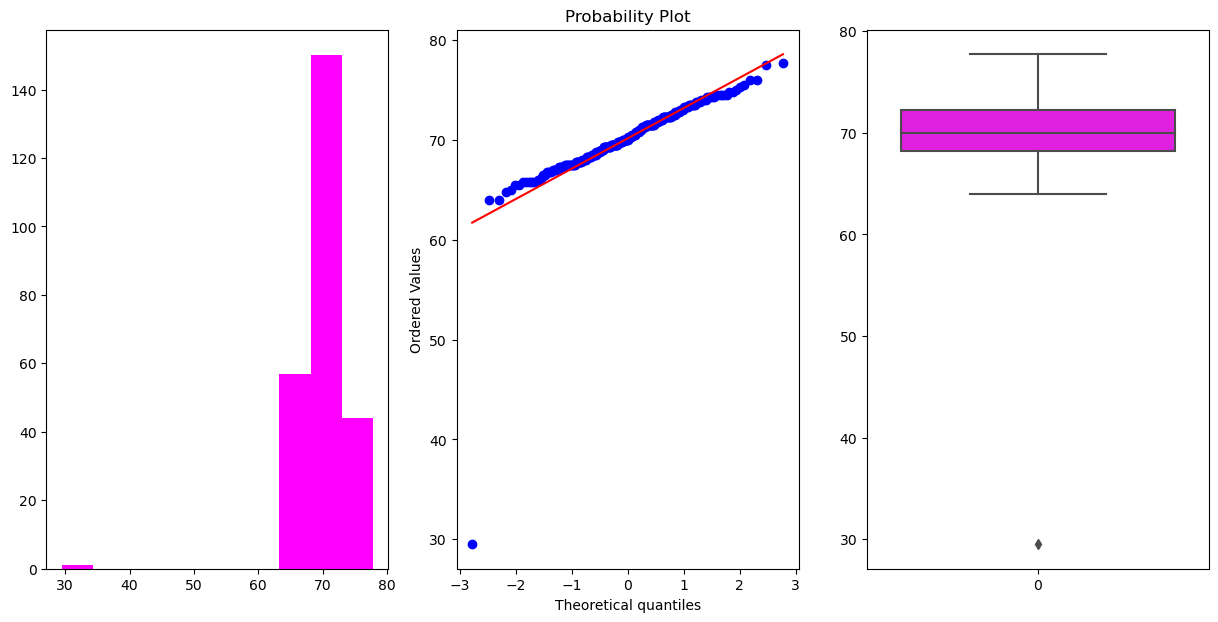

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Neck are shown below


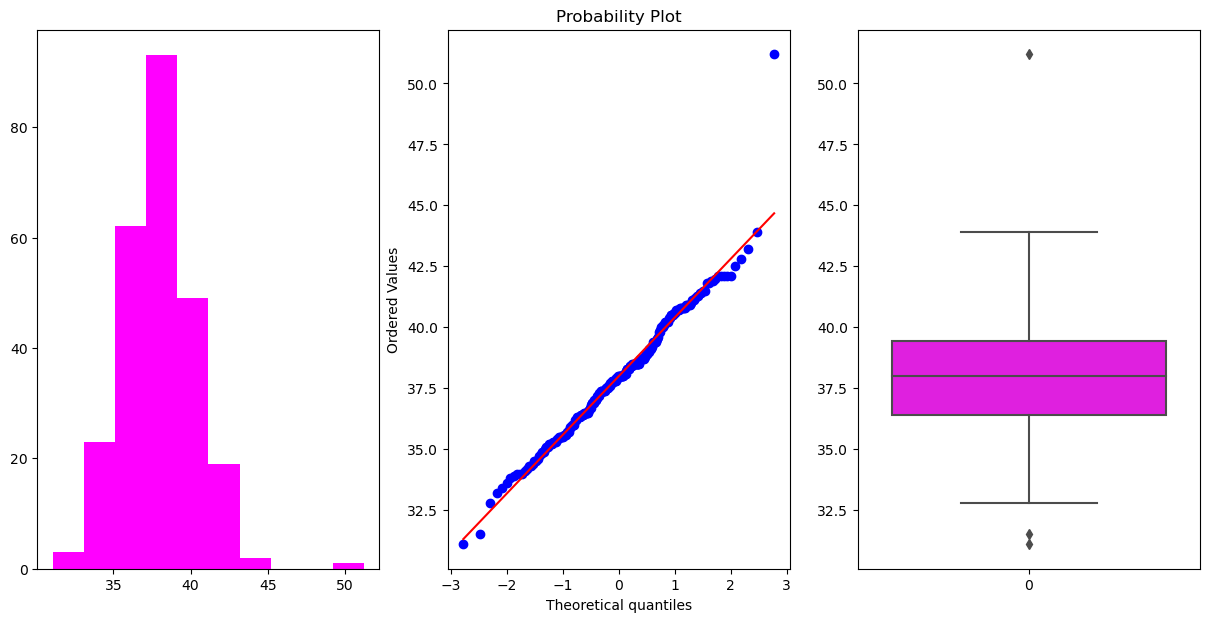

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Chest are shown below


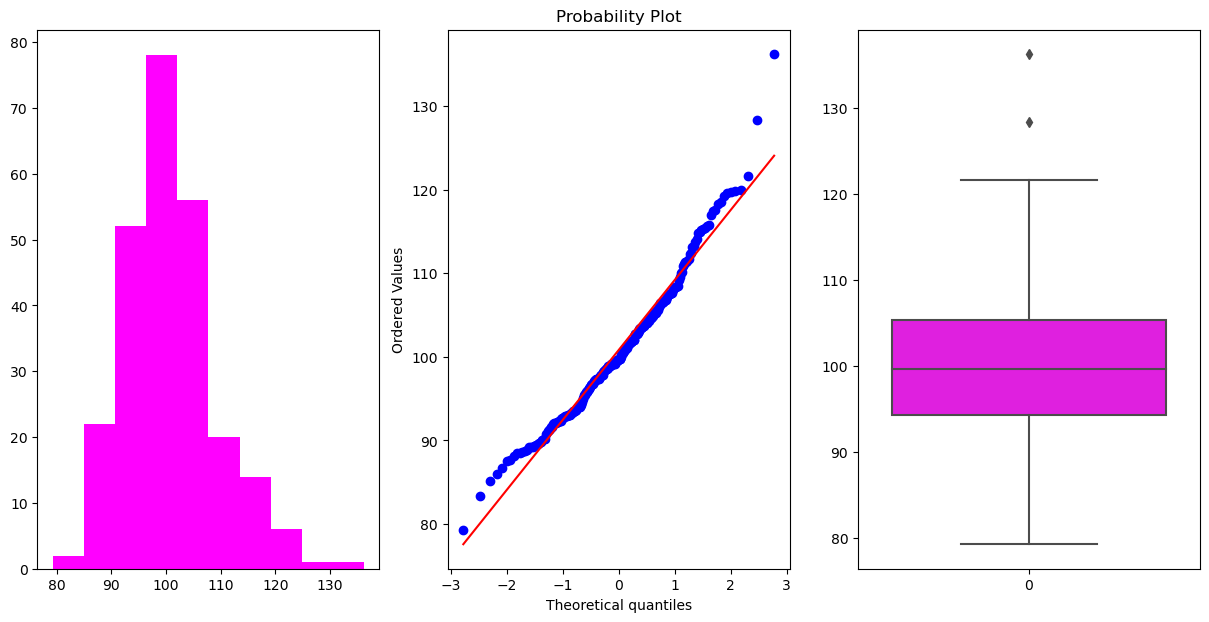

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Abdomen are shown below


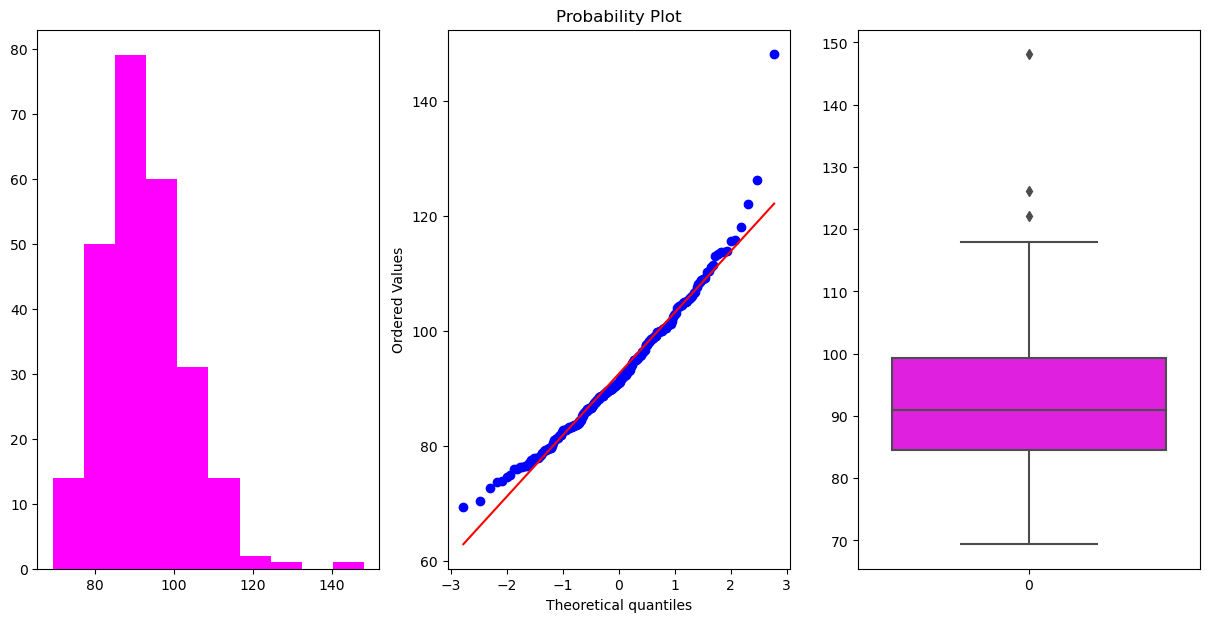

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Hip are shown below


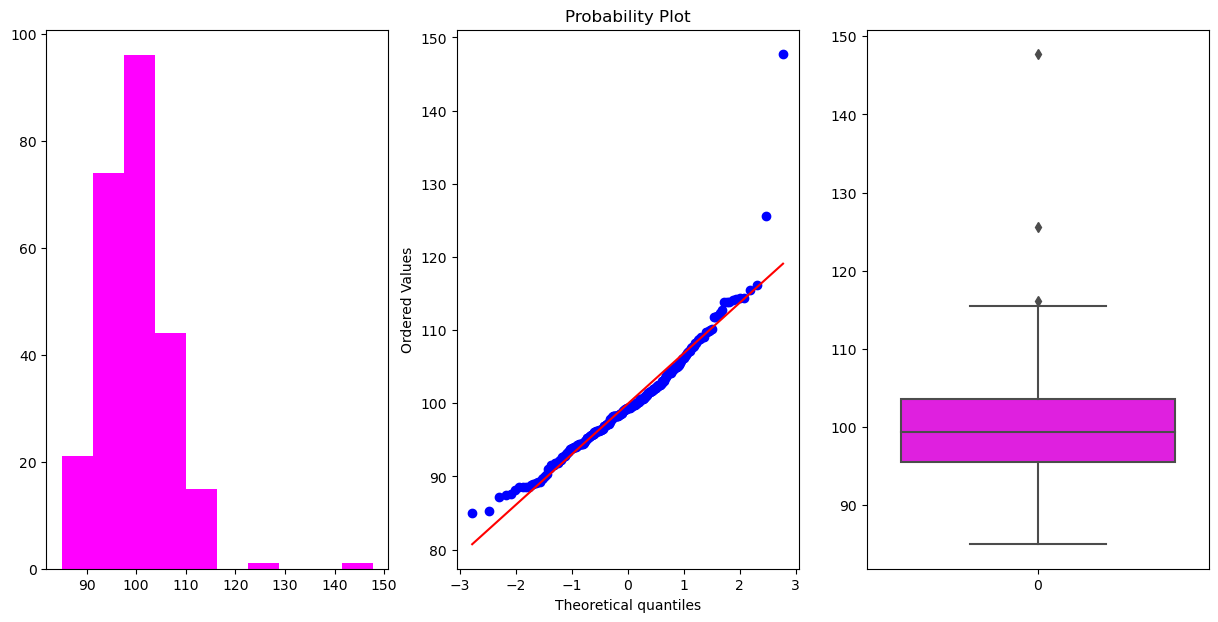

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Thigh are shown below


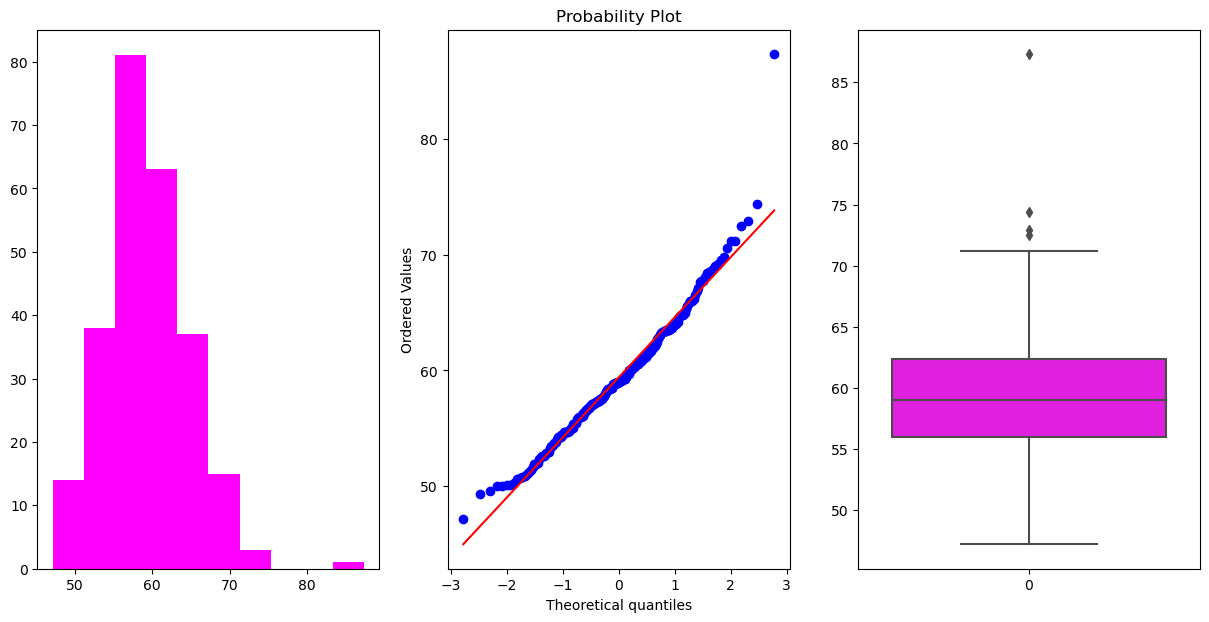

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Knee are shown below


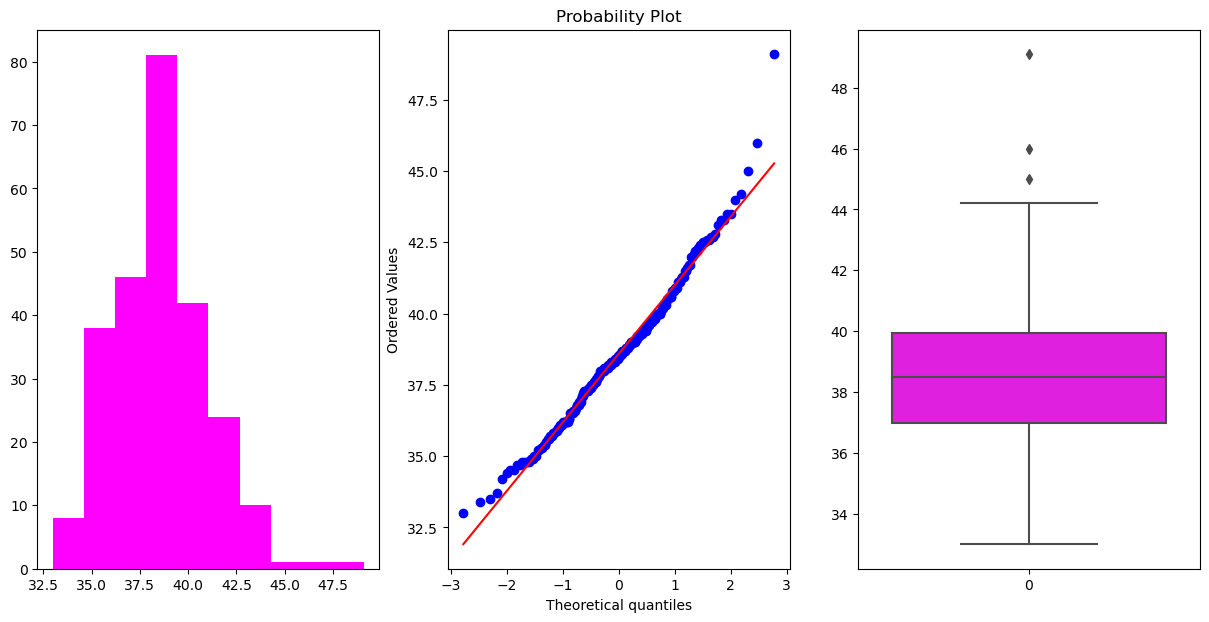

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Ankle are shown below


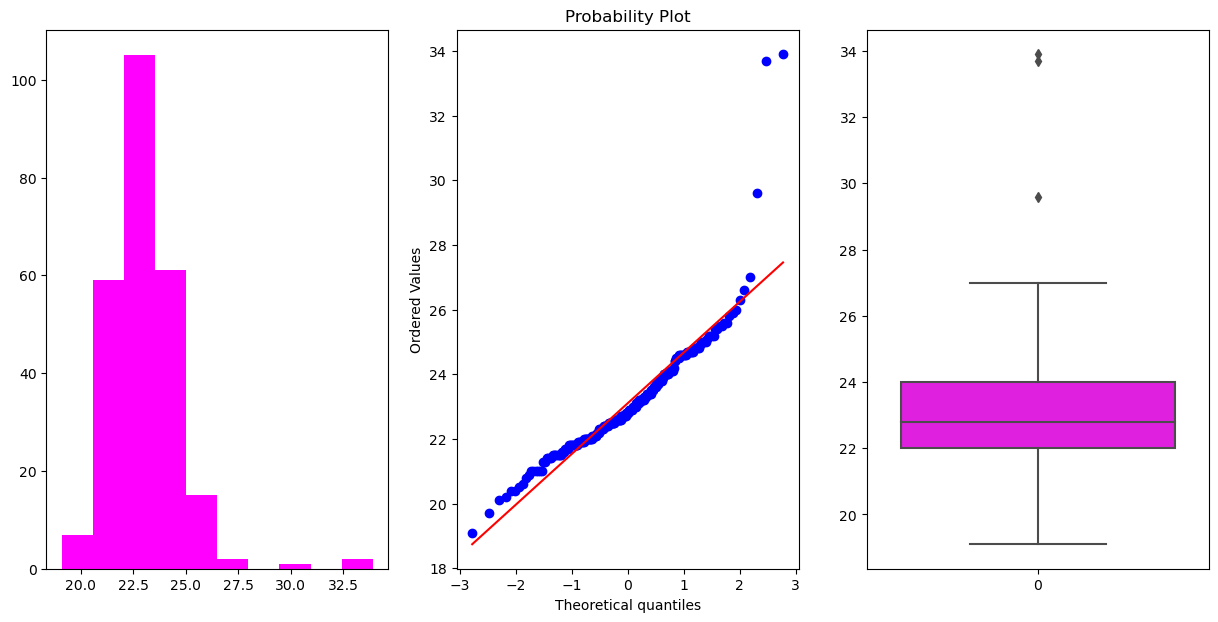

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Biceps are shown below


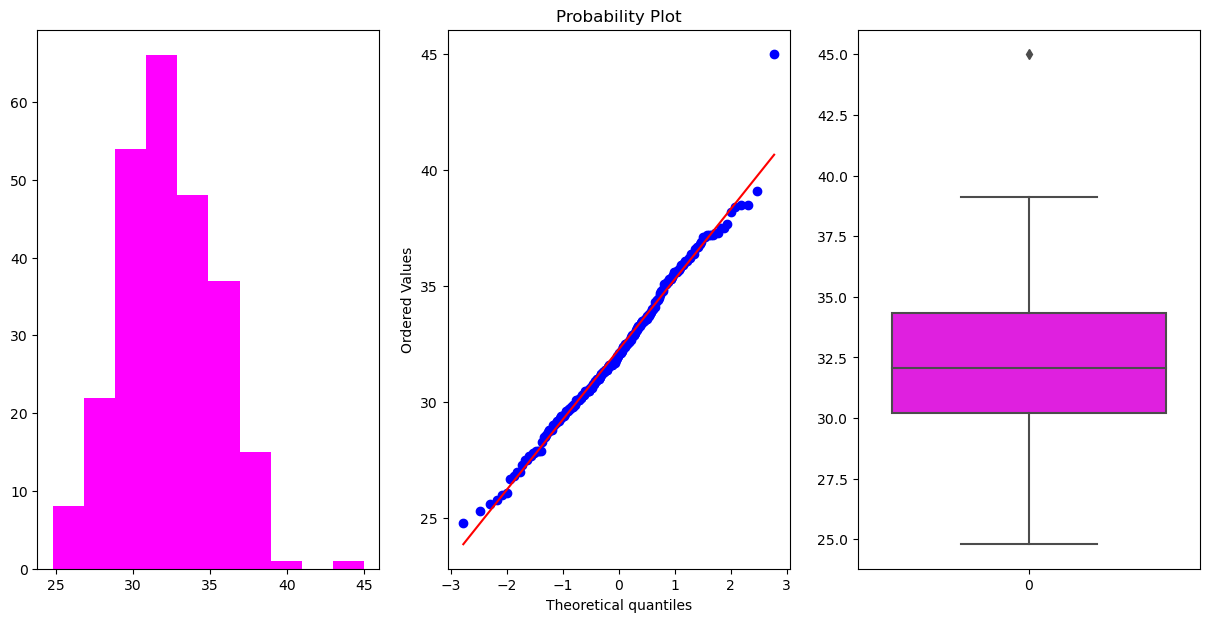

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Forearm are shown below


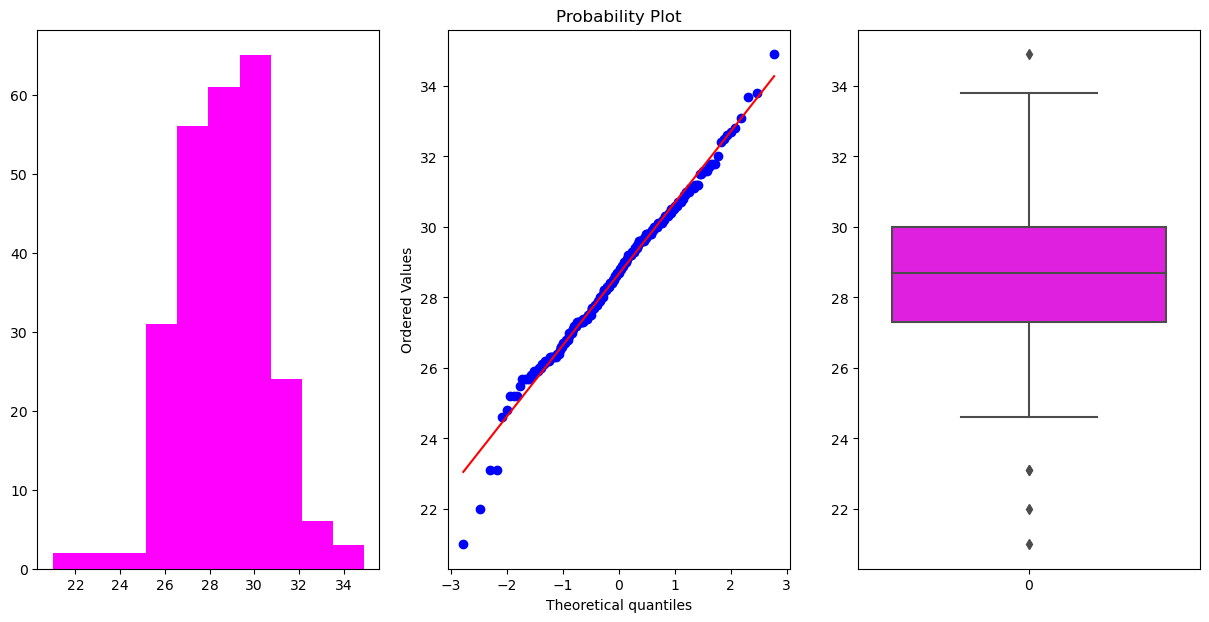

----------------------------------------------------------------------------------------------------
Distribution plots for the feature Wrist are shown below


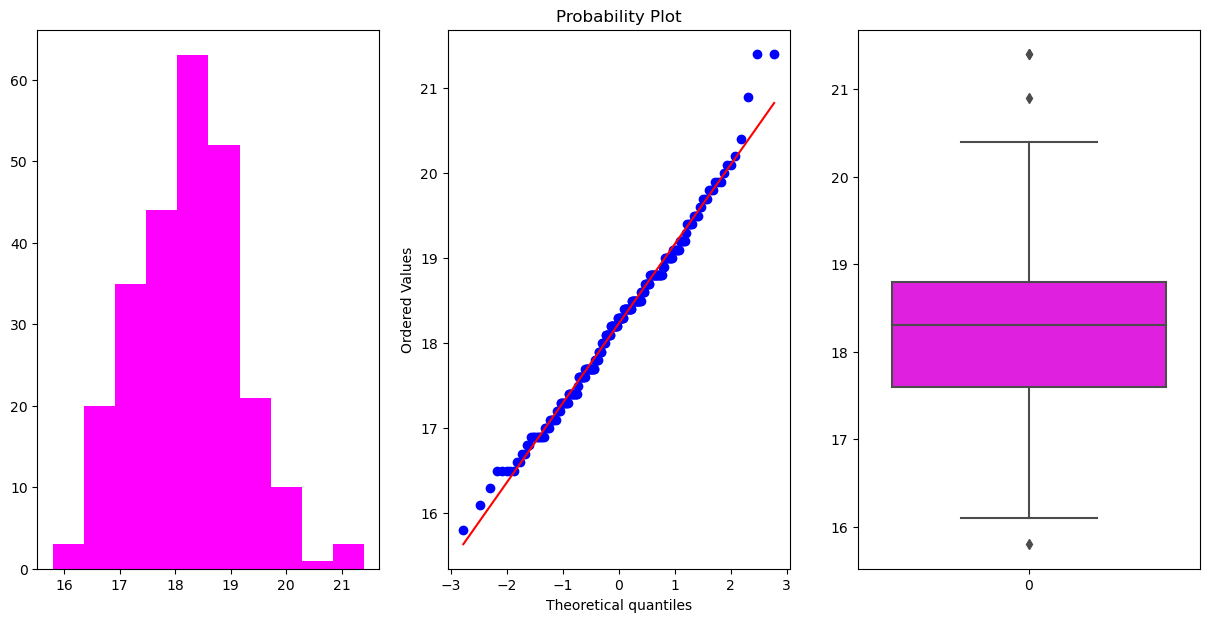

----------------------------------------------------------------------------------------------------


In [5]:
def drawplots(df, col):
    plt.figure(figsize=(15, 7))
    plt.subplot(1, 3, 1)
    plt.hist(df[col], color="magenta")
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[col], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    sns.boxplot(df[col], color="magenta")
    
    plt.show()

cols = list(df.columns)
for col in cols:
    print(f"Distribution plots for the feature {col} are shown below")
    drawplots(df, col)
    print("-"*100)

<p><b>Finding:</b> Attributes in the Bodyfat dataset follow gaussian distribution. As a result, linear models can be used to make predictions.</p>

<h2>Outlier Analysis</h2>

In [6]:
# Compute the upper and lower limits of each attribute
upperlimit = []
lowerlimit = []
for col in df.columns:
    upperlimit.append(df[col].mean() + (df[col].std())*4)
    lowerlimit.append(df[col].mean() - (df[col].std())*4)

In [7]:
# Filter the outliers from the dataset
cols = list(df.columns)
j = 0
for col in cols:
    temp = df.loc[(df[col] > upperlimit[j]) & (df[col] < lowerlimit[j])]
    j += 1

temp

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist


<p><b>Finding:</b> There are no outliers present in the dataset</p>

<h2>Feature Selection</h2>

<h3>Extra Trees Regressor</h3>

In [8]:
# Split the dataframe into train and test datasets
data = df.copy()
test = data["BodyFat"]
train = data.drop(["BodyFat"], axis=1)

In [9]:
# Train a Extra Trees Regressor model
etr_model = ExtraTreesRegressor()
etr_model.fit(train, test)

ExtraTreesRegressor()

In [10]:
# Print the extra trees regressor model's feature importances
etr_model.feature_importances_

array([0.73130722, 0.00145699, 0.01716293, 0.00426182, 0.00480903,
       0.05654212, 0.15217572, 0.01469719, 0.00870602, 0.00334542,
       0.00131223, 0.00116712, 0.00093872, 0.00211747])

<AxesSubplot: >

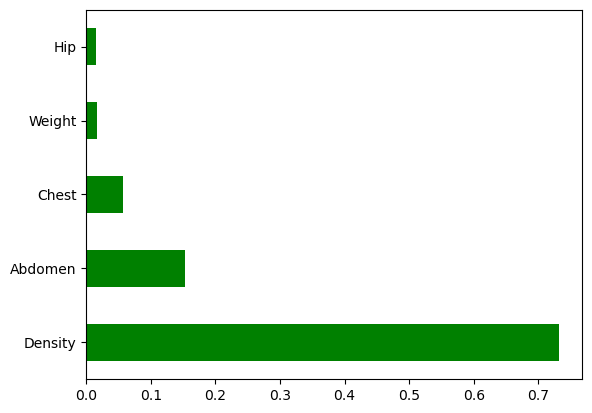

In [11]:
# Display the top 5 important features as per Extra Trees Regressor model
series = pd.Series(etr_model.feature_importances_, index = train.columns)
series.nlargest(5).plot(kind="barh", color="green")

<h3>Mutual Information Gain</h3>

In [12]:
# Train a mutual information gain regressor model
mig_model = mutual_info_regression(train, test)

<AxesSubplot: >

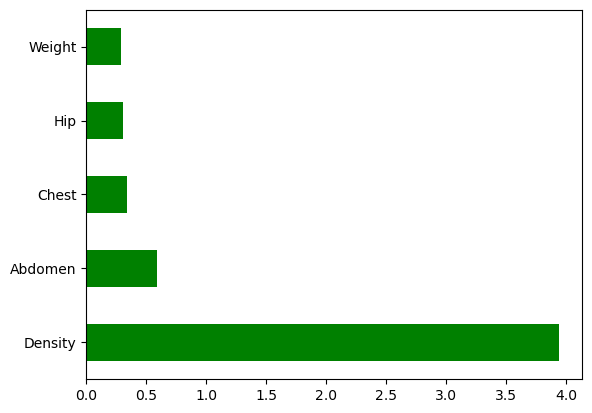

In [13]:
# Display the top 5 important features as per mutual information gain regressor model
plotdata = pd.Series(mig_model, index=train.columns)
plotdata.nlargest(5).plot(kind="barh", color="green")

<h3>Feature Correlation Analysis</h3>

In [14]:
data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


<AxesSubplot: >

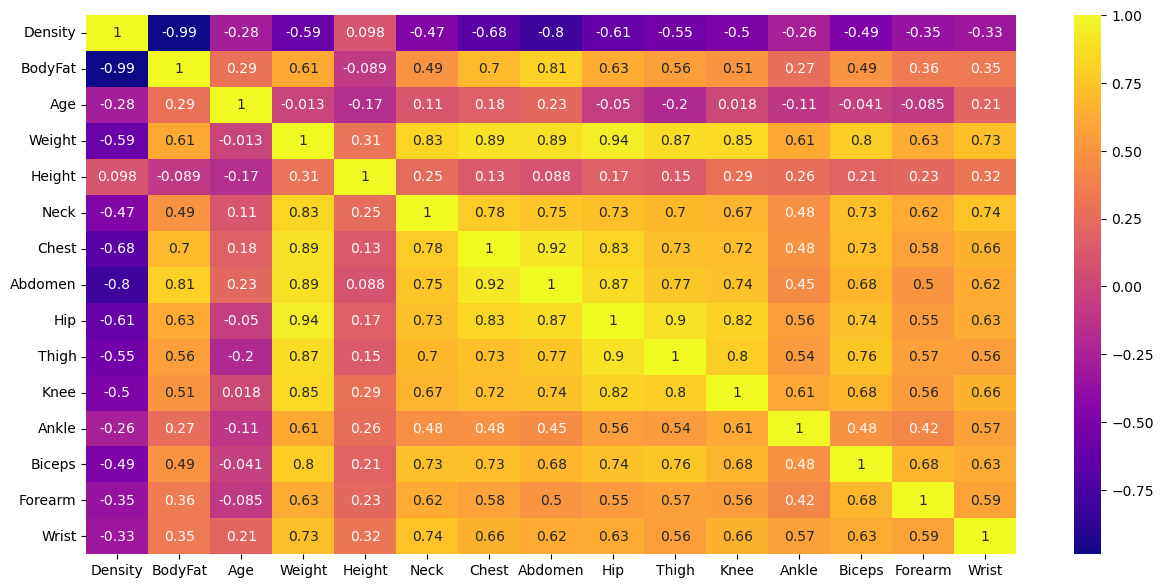

In [15]:
# Plot the features correlation matrix
plt.figure(figsize = (15, 7))
sns.heatmap(data.corr(), annot=True, cmap="plasma")

In [16]:
# Filter the attributes from the features list that are highly correlated
def correlation(df, threshold):
    colcor = set()
    cormat = df.corr()
    
    for i in range(len(cormat)):
        for j in range(i):
            """
            For each cell, get the value of that cell by iloc[i][j], 
            where i is the row and j is the column if that abs(value) is greater
            than the threshold, get the col_name and add it in the set
            """
            if(abs(cormat.iloc[i][j]) > threshold):
                colname = cormat.columns[i]
                colcor.add(colname)
    
    return colcor

colcor = correlation(data, threshold=0.85)
colcor

{'Abdomen', 'BodyFat', 'Chest', 'Hip', 'Knee', 'Thigh'}

<p><b>Finding:</b> From the above feature selection techniques, we can say that the features recommended by <i>Extra Trees Regressor</i> and <i>Mutual Information Gain</i> are correct and from the correlation map we get to observe a similar pattern. i.e. <i>Abdomen</i> and <i>Hip</i> features are quite similar and so are <i>Knee</i> and <i>Thigh</i> features. They are highly collinear to each other. We can keep any one of the them. Since, the feature <i>Abdomen</i> gave higher feature importance score in comparison to other correlated features, we will retain the <i>Abdomen</i> feature.</p>

<h3>Variance Inflation Factor</h3>

In [17]:
# Evaluate feature importances based on variance inflation factor
temp = data[list(data.columns)]
info = pd.DataFrame()
info["VIF"] = [variance_inflation_factor(temp.values, i) for i in range(temp.shape[1])]
info["Column"] = temp.columns
info

,VIF,Column
0,3695.622377,Density
1,33.845429,BodyFat
2,31.376101,Age
3,1238.097164,Weight
4,613.410514,Height
5,1081.965633,Neck
6,1374.457425,Chest
7,1332.624257,Abdomen
8,2933.636131,Hip
9,1017.257501,Thigh


In [18]:
# Display the important based on Extra Trees Regressor and Mutual information gain
important_features_etr = list(series.nlargest(5).index)
important_features_mig = list(plotdata.nlargest(5).index)

important_features_etr, important_features_mig

(['Density', 'Abdomen', 'Chest', 'Weight', 'Hip'],
 ['Density', 'Abdomen', 'Chest', 'Hip', 'Weight'])

<p><b>Finding:</b> Extra Trees Regressor, Mutual Information Gain, Correlation Analysis, and Variance Inflation Factor are all pointing towards the following 5 features being important:
    <ol>
        <li>Density</li>
        <li>Abdomen</li>
        <li>Chest</li>
        <li>Weight</li>
        <li>Hip</li>
    </ol>
</p>

In [19]:
# Filter the dataframe based on important feature attributes
reduced_train_df = train[important_features_etr]
reduced_train_df.head()

,Density,Abdomen,Chest,Weight,Hip
0,1.0708,85.2,93.1,154.25,94.5
1,1.0853,83.0,93.6,173.25,98.7
2,1.0414,87.9,95.8,154.00,99.2
3,1.0751,86.4,101.8,184.75,101.2
4,1.0340,100.0,97.3,184.25,101.9
